<a href="https://colab.research.google.com/github/AnjanGanguly/Melanoma-Detection-Assignment/blob/main/Anjan_Ganguly_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement: To build a CNN based model which can accurately detect melanoma.**

In [2]:
#import all important libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**1. Data Reading**

In [10]:
# Mounting google drive to read data
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/My Drive/Colab Notebooks/CNN_assignment.zip" > /dev/null

Mounted at /content/drive


In [11]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [12]:
# Number of images in Train directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

# Number of images in Test directory
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**2. Dataset Creation: Using 80% of the images for training, and 20% for validation.**



In [13]:
# Define parameters

batch_size = 32
img_height = 180
img_width = 180

In [14]:
## Creating training dataset here using seed=123

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="training",
  batch_size=batch_size,
  image_size=(img_height,img_width))

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [15]:
## Creating validation dataset here using seed=123

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="validation",
  batch_size=batch_size,
  image_size=(img_height,img_width))

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [16]:
# Stored all the classes of skin cancer in a list.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**3. Dataset Visualization**

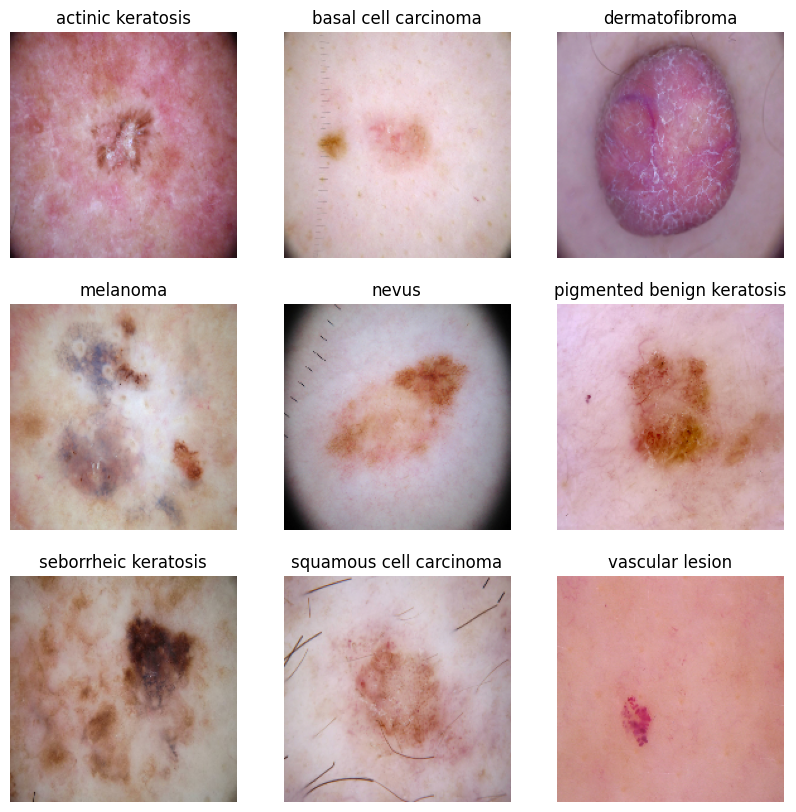

In [17]:
# Visualization of one instance of all the nine classes present in the dataset

plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
  vis_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
  for image, label in vis_ds.take(1):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[0].numpy().astype("uint8"))
    plt.title(class_names[label.numpy()[0]])
    plt.axis("off")

The CNN model consists of three convolution blocks with a max pooling layer in each of them. There's a fully-connected layer with 128 units on top of it that is activated by a ReLU activation function.

In [18]:
# Configure the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**4. Model Creation and Training**

The CNN model consists of the following layers:

1.   Three convolution blocks
2.   Three max pooling layers
3.   FC layer
4.   Three Dropout layers



In [19]:
# Building a sequential model with convolution layers, max pooling and dropout layers

num_classes = len(class_names)

model = Sequential([
    # normalize pixel values between (0,1)
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # first convolution layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # second convolution layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # third convolution layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [20]:
# Optimizer used is ADAM (for fast convergence) and loss function is Cross Entropy (for classification problem)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

In [22]:
# Training the model for 20 epochs

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 122ms/step - loss: 2.1787 - accuracy: 0.1903 - val_loss: 2.0412 - val_accuracy: 0.1991
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.8840 - accuracy: 0.3170 - val_loss: 1.8380 - val_accuracy: 0.3803
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.7112 - accuracy: 0.3728 - val_loss: 1.7320 - val_accuracy: 0.3915
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5296 - accuracy: 0.4475 - val_loss: 1.5610 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4779 - accuracy: 0.4621 - val_loss: 1.5488 - val_accuracy: 0.4452
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4266 - accuracy: 0.4838 - val_loss: 1.4641 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3646 - accuracy: 0.5089 - val_loss: 1.4311 - val_accuracy: 0.4877
Epoch 8/20


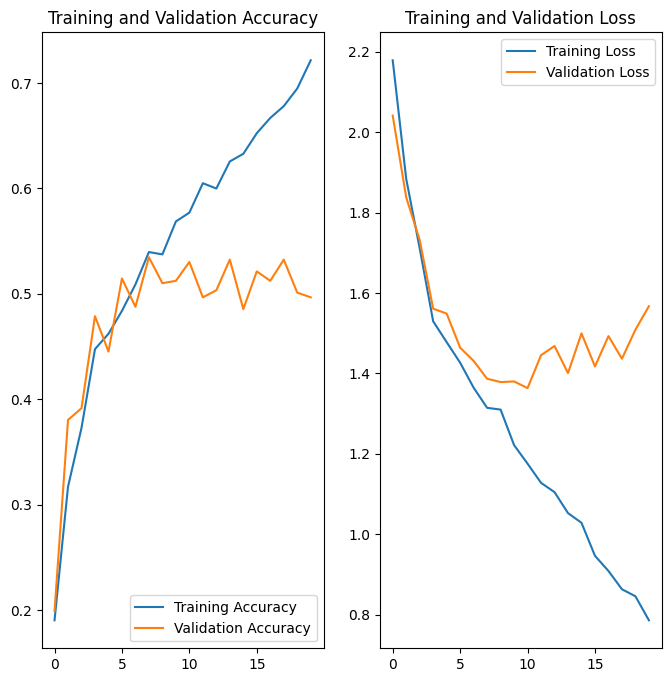

In [23]:
# Result visualization

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**: Training accuracy is higher than validation accuracy. This implies that the model is overfitting.

Nexct we use data augmentation to generate additional images from the existing images by augmenting them using random transformations .

**5. Data Augmentation**

We will use flip, rotate, zoom, contrast, etc on the existing images to generate new ones.



In [24]:
# Data augmentation with flip, rotate, zoom and contrast

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
  ]
)

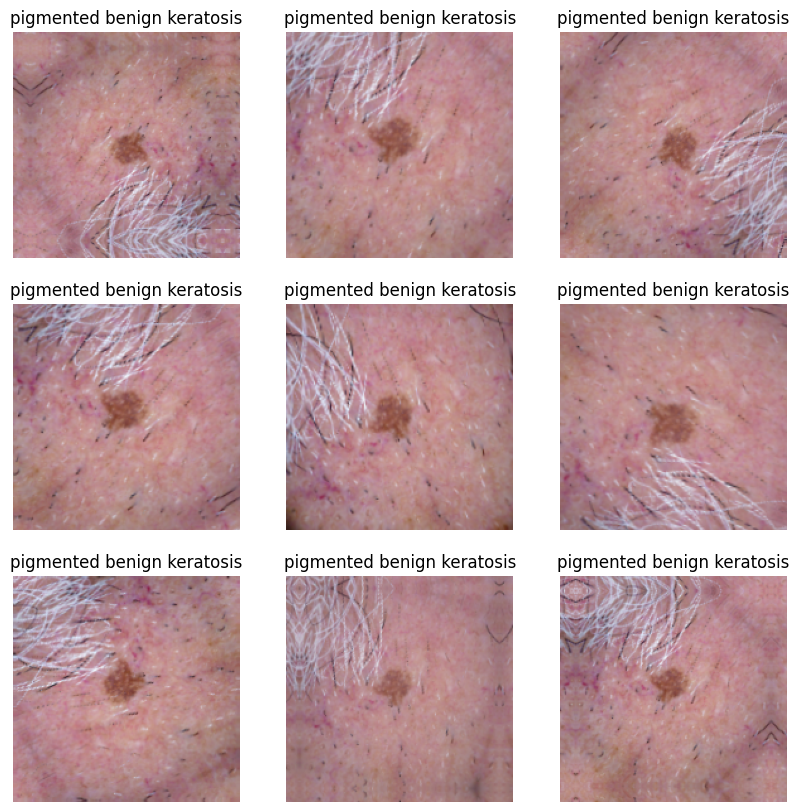

In [26]:
# Visualization of augmentation strategy for one instance of training image.

plt.figure(figsize=(10, 10))

for image, label in train_ds.take(1):
    for i in range(len(class_names)):
        augmented_image = data_augmentation(image)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.title(class_names[label[0]])
        plt.axis("off")

6. **Model Creation and Training after Data Augmentation**

    The CNN model consists of the following layers:
    1. Three convolution blocks
    2. Three max pooling layers
    3. FC layer
    4. Three Dropout layers

In [30]:
# Add the data augmentation to previous model

num_classes = len(class_names)

model = Sequential([
    # add augmented data
    data_augmentation,

    # normalize pixel values between (0,1)
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # first convolution layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # second convolution layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # third convolution layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [31]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                      

In [33]:
# Training the model for 20 epochs

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 37ms/step - loss: 2.3946 - accuracy: 0.1998 - val_loss: 2.0422 - val_accuracy: 0.2237
Epoch 2/20
56/56 [==============================] - 2s 33ms/step - loss: 2.0221 - accuracy: 0.2327 - val_loss: 2.0209 - val_accuracy: 0.3087
Epoch 3/20
56/56 [==============================] - 2s 33ms/step - loss: 1.9547 - accuracy: 0.2712 - val_loss: 1.9842 - val_accuracy: 0.3087
Epoch 4/20
56/56 [==============================] - 2s 33ms/step - loss: 1.8942 - accuracy: 0.3276 - val_loss: 1.8610 - val_accuracy: 0.3400
Epoch 5/20
56/56 [==============================] - 2s 33ms/step - loss: 1.7141 - accuracy: 0.3890 - val_loss: 1.6614 - val_accuracy: 0.4430
Epoch 6/20
56/56 [==============================] - 2s 34ms/step - loss: 1.7046 - accuracy: 0.3806 - val_loss: 1.7801 - val_accuracy: 0.3826
Epoch 7/20
56/56 [==============================] - 2s 35ms/step - loss: 1.6140 - accuracy: 0.4230 - val_loss: 1.6418 - val_accuracy: 0.4698
Epoch 8/20
56

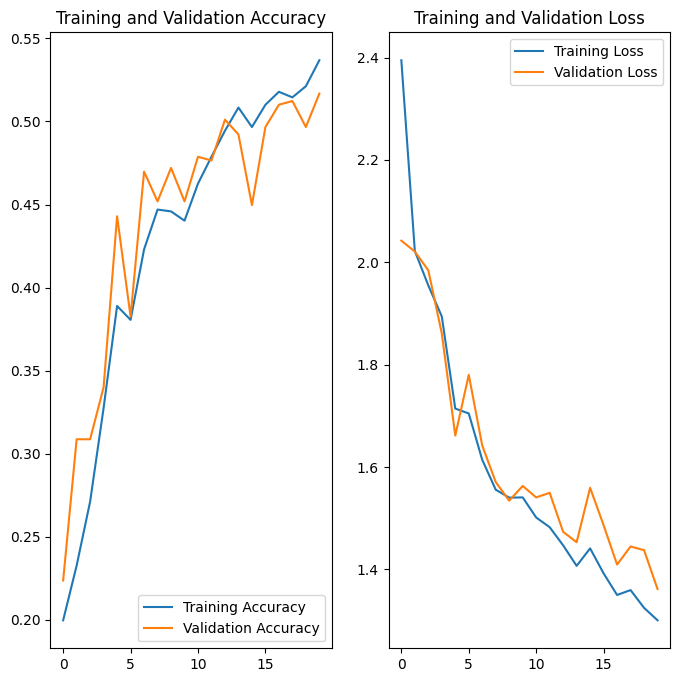

In [35]:
# Result visualization

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:** The overfitting problem of the previous run has improved. The Training accuracy and validation accuracy are closer in range after data augmentation. The accuracy is still very low. The code below checks the distribution of classes in the data to figure out if there is class imbalance.

**7. Class Distribution**

In [36]:
# find the distribution of each class

count = {}
df = pd.DataFrame()
for i in range(len(class_names)):
  count[i] = len(list(data_dir_train.glob(f'{class_names[i]}/*.jpg')))
df['class'] = class_names
df['count'] = count
df.head(10)

,class,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


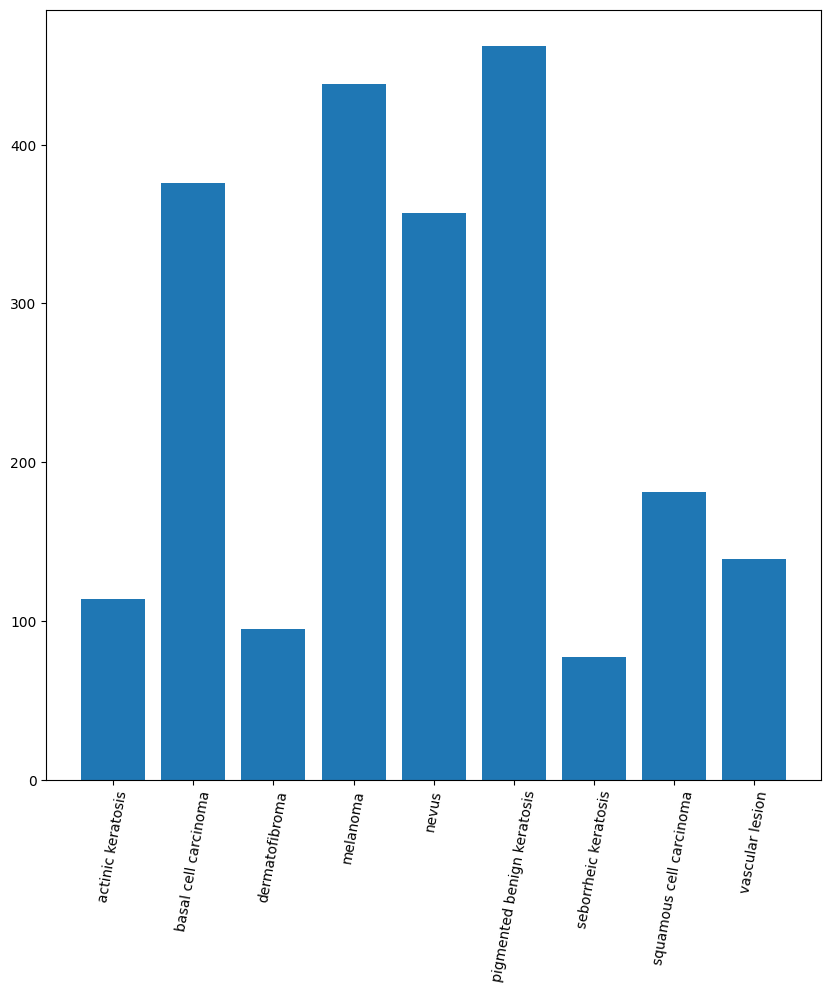

In [37]:
# plot a bar chart of the distribution

plt.figure(figsize=(10, 10))
plt.bar(df['class'], df['count'])
plt.xticks(rotation=80)
plt.show()

**Findings**:

Seborrheic keratosis (77) has the least number of samples.

Pigmented benign keratosis (462) and Melanoma (438) dominate the data in terms proportionate number of samples.

There is a class imbalance issue in the distribution of images for each class. This can be rectified by adding more samples across all classes.

**8. Handling Class Imbalances**

In [38]:
!pip install Augmentor

In [39]:
# Instantiation of Augmentor to augment the existing dataset with 500 samples per class

path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79941A96FC70>: 100%|██████████| 500/500 [00:20<00:00, 23.94 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x799401BAB850>: 100%|██████████| 500/500 [00:18<00:00, 27.40 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7993F051F6D0>: 100%|██████████| 500/500 [00:15<00:00, 31.98 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7993F051F730>: 100%|██████████| 500/500 [01:23<00:00,  5.98 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7994840B66B0>: 100%|██████████| 500/500 [01:22<00:00,  6.03 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7993F04174C0>: 100%|██████████| 500/500 [00:16<00:00, 31.12 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x799482918D30>: 100%|██████████| 500/500 [00:36<00:00, 13.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7994841258D0>: 100%|██████████| 500/500 [00:15<00:00, 32.82 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79942B9A58D0>: 100%|██████████| 500/500 [00:14<00:00, 33.42 Samples/s]


In [58]:
# total count of augmented images

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [57]:
# distribution of augmented data after adding new images to the original training data

for i in class_names:
    dir_path_old = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
    dir_path_augmented = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+'/'+i+'/output/')

    length_total = len(list(dir_path_old.glob(i+'/*.jpg'))) + len(list(dir_path_augmented.glob('*.jpg')))
    print(f'{i} has {length_total} images.')

actinic keratosis has 614 images.
basal cell carcinoma has 876 images.
dermatofibroma has 595 images.
melanoma has 938 images.
nevus has 857 images.
pigmented benign keratosis has 962 images.
seborrheic keratosis has 577 images.
squamous cell carcinoma has 681 images.
vascular lesion has 639 images.


In [59]:
# Define parameters

batch_size = 32
img_height = 180
img_width = 180

In [60]:
## Creating training dataset here using seed=123

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="training",
  batch_size=batch_size,
  image_size=(img_height,img_width))

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [61]:
## Creating validation dataset here using seed=123

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="validation",
  batch_size=batch_size,
  image_size=(img_height,img_width))

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


9. **Model Creation and Training after handling Class Imbalance**

    The CNN model consists of the following layers:
    1. Three convolution blocks
    2. Three max pooling layers
    3. FC layer
    4. Three Dropout layers

In [62]:
# Building a sequential model with convolution layers, max pooling and dropout layers

num_classes = len(class_names)

model = Sequential([
    # normalize pixel values between (0,1)
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # first convolution layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # second convolution layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # third convolution layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [63]:
# Optimizer used is ADAM (for fast convergence) and loss function is Cross Entropy (for classification problem)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [65]:
# Training the model for 20 epochs

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 28s 153ms/step - loss: 2.0534 - accuracy: 0.2391 - val_loss: 1.7239 - val_accuracy: 0.3935
Epoch 2/20
169/169 [==============================] - 27s 156ms/step - loss: 1.5183 - accuracy: 0.4216 - val_loss: 1.7900 - val_accuracy: 0.3267
Epoch 3/20
169/169 [==============================] - 27s 154ms/step - loss: 1.3358 - accuracy: 0.4963 - val_loss: 1.5368 - val_accuracy: 0.4276
Epoch 4/20
169/169 [==============================] - 28s 163ms/step - loss: 1.2158 - accuracy: 0.5447 - val_loss: 1.4884 - val_accuracy: 0.4491
Epoch 5/20
169/169 [==============================] - 31s 179ms/step - loss: 1.0899 - accuracy: 0.5964 - val_loss: 1.2365 - val_accuracy: 0.5382
Epoch 6/20
169/169 [==============================] - 27s 153ms/step - loss: 1.0198 - accuracy: 0.6326 - val_loss: 1.3848 - val_accuracy: 0.5048
Epoch 7/20
169/169 [==============================] - 27s 153ms/step - loss: 0.8990 - accuracy: 0.6723 - val_loss: 1.1962 - val_ac

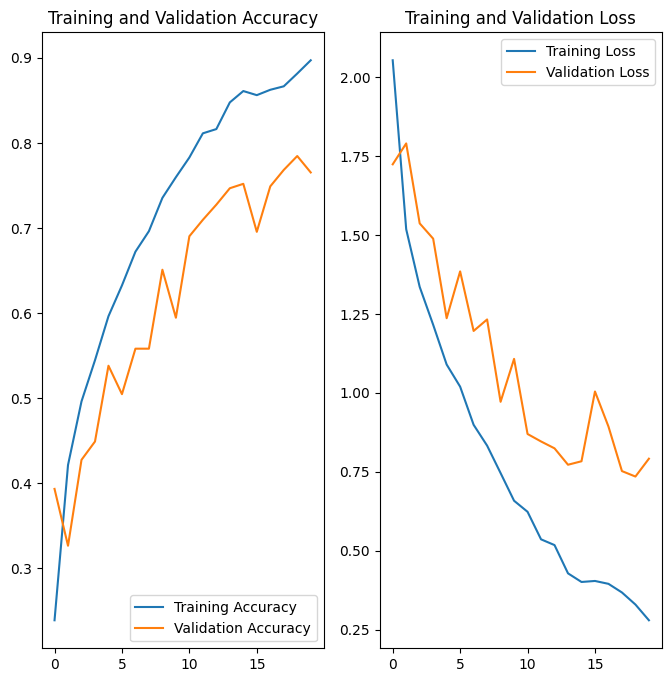

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:** The training accuracy (89%) and validation accuracy (76%) have both improved. There is still overfitting in the dataset. Let us use another Dropout Layer and see if the results improve.

In [69]:
# Building a sequential model with an extra dropout layer

num_classes = len(class_names)

model = Sequential([
    # normalize pixel values between (0,1)
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # first convolution layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # second convolution layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # third convolution layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # extra dropout layer added here
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax')
])

In [70]:
# Optimizer used is ADAM (for fast convergence) and loss function is Cross Entropy (for classification problem)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [72]:
# Training the model for 20 epochs

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 37s 197ms/step - loss: 2.2072 - accuracy: 0.1712 - val_loss: 2.1308 - val_accuracy: 0.1693
Epoch 2/20
169/169 [==============================] - 27s 153ms/step - loss: 1.7797 - accuracy: 0.3182 - val_loss: 1.6327 - val_accuracy: 0.3719
Epoch 3/20
169/169 [==============================] - 27s 158ms/step - loss: 1.5125 - accuracy: 0.4325 - val_loss: 1.4830 - val_accuracy: 0.4313
Epoch 4/20
169/169 [==============================] - 27s 155ms/step - loss: 1.3661 - accuracy: 0.4965 - val_loss: 1.4018 - val_accuracy: 0.4714
Epoch 5/20
169/169 [==============================] - 26s 152ms/step - loss: 1.2251 - accuracy: 0.5299 - val_loss: 1.2378 - val_accuracy: 0.5345
Epoch 6/20
169/169 [==============================] - 31s 178ms/step - loss: 1.1411 - accuracy: 0.5682 - val_loss: 1.2244 - val_accuracy: 0.5278
Epoch 7/20
169/169 [==============================] - 31s 180ms/step - loss: 1.0601 - accuracy: 0.5976 - val_loss: 1.0759 - val_ac

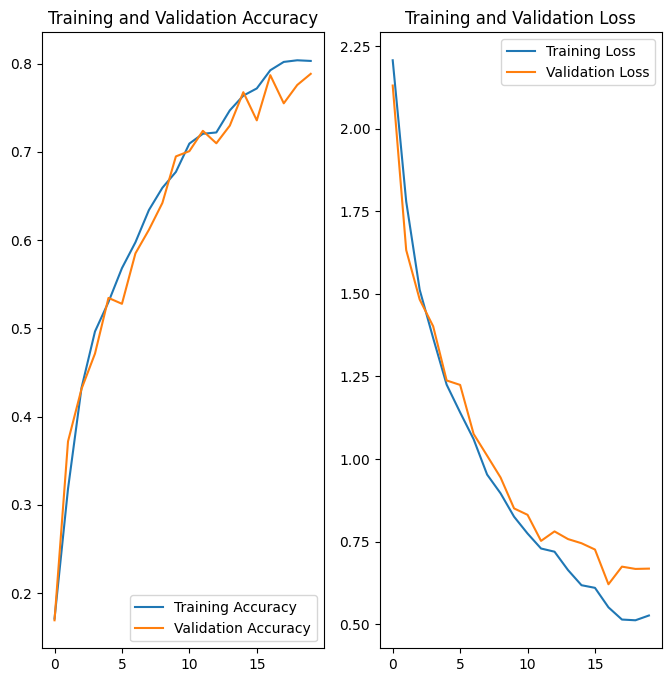

In [73]:
# Result visualization

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:** The overfitting issue has been resolved by adding an extra dropout layer. The training accuracy (80%) and validation accuracy (79%) are close in range.

1. The training accuracy and validation accuracy are almost same. This is a sign of good fit.
2. The training loss and validation loss are almost same. This is a sign of good fit.
3. The model is able to classify the images with 79% accuracy. A more complex model and dataset will improve this accuracy.